<a href="https://colab.research.google.com/github/zitoyeo/EDA-Modeling/blob/main/Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 둘러보기

In [ ]:
# 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!re ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

In [ ]:
# 기본패키지 불러오기

import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(font_scale=1)
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
# 드라이브에 올려준 엑셀 데이터 파일 불러오기
oln = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
oln.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# <컬럼 설명 >
1. invoiceNo = 주문번호
2. StockCode = 상품코드
3. Description = 상품설명
4. Quantity = 수량
5. invoiceDate = 주문날짜
6. UnitPrice = 개별 가격
7. CustomerID= 고객번호
8. Country = 국가

In [ ]:
oln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 범주형 변수 : 빈도 prequency  계산가능
invoiceNo ,StockCode, description, custormerid,  country

# 연속형 변수 : 평균, 표준편차. min/max등 수치 계산 가능

Quantity, UnitPrice, invoicedate

In [ ]:
# 범주형 통계치 확인하기
oln.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [ ]:
#데이터 내용 정리해서 출력하기
print("총 출력데이터 수 :" , oln.shape[0]* oln.shape[1])
print("총 결측치 수 : {} = 전체 데이터의 {:.2f}%".format(
    oln.isnull().sum().sum(),
    (oln.isnull().sum().sum() * 100) / (oln.shape[0] * oln.shape[1])
))

print("전체 국가 수 : ", oln.Country.nunique())
print("전체 판매 물건 수 : ", oln.Description.nunique())

총 출력데이터 수 : 4335272
총 결측치 수 : 136534 = 전체 데이터의 3.15%
전체 국가 수 :  38
전체 판매 물건 수 :  4223


# 질문하기
1. 어떤 고객이 가장많이 샀을까?
2. 상품 금액의 분포는?
3. 어떤 물건의 주문량이 높을까 ?
4. 날짜에 따라 판매 금액을 확인해보자
5. 요일에 따라 주문량이 다를까 ?
6. 국가 별 평균 구매 금액은 ?
7. 이 쇼핑몰 판매 물품의 주요 키워드는?

In [ ]:
# 컬럼명 앞이 대문자라서 일할 때 불편
# 컬럼명을 전부 소문자로 바꿔주기
oln.columns = oln.columns.str.lower()
oln.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

3-2 결측치 처리하기

In [ ]:
# 각컬럼에 null이 몇개 존재하는지 확인하기
oln.isnull().sum(axis=0)

,0
invoiceno,0
stockcode,0
description,1454
quantity,0
invoicedate,0
unitprice,0
customerid,135080
country,0


In [ ]:
# 결측치가 있는 컬럼 내용 확인하기 (Description, CustomerID)
oln[oln.isnull().any(axis = 1)].head()
# Nan으로 결측치 측정됨.

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [ ]:
# 고객 아이디가 존재하지 않는 경우는 분석에 넣기 어려우므로, 결측치 다 제거하고 분석하자
oln1 = oln.dropna()
oln1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## 3.3 컬럼타입 변경


In [ ]:
#customerID의 경우 float일 이유가 없음 int64로 바꿔주기

oln1['customerid'] = oln1['customerid'].astype('int64')
oln1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  int64         
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


<ipython-input-13-c1db1c009a1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oln1['customerid'] = oln1['customerid'].astype('int64')


## 3.4 새로운 컬럼 만들기

In [ ]:
# min/max 확인하면 판매수량 컬럼에 음수 값이 들어가있음.
print(min(oln1['quantity']), max(oln['quantity']))
print(min(oln1['unitprice']), max(oln['unitprice']))

-80995 80995
0.0 38970.0


In [ ]:
# 판매량이 음수인것들은  = 주문취소 ?
# 여기서는 판매 수량이 양수인 것만 고려하자

oln1 = oln1[oln1.quantity > 0]

In [ ]:
#가격 * 판매수량 = 사용 금액을 계산할 수 있다.
# 사용금액(spent)라는 새로운 컬럼을 만들지

oln1['spent'] = oln1['quantity'] * oln1['unitprice']
oln1.head()

<ipython-input-16-1379eec93cad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oln1['spent'] = oln1['quantity'] * oln1['unitprice']


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# 월별 상품 수량 주문 집계를 하고 싶으므로, 연,월,일 컬럼을 만든다.
oln1['year'] = oln['invoicedate'].dt.year
oln1['month'] = oln['invoicedate'].dt.month
oln1['day'] = oln['invoicedate'].dt.day
oln1['weekday'] = oln['invoicedate'].dt.weekday
oln1['hour'] = oln['invoicedate'].dt.hour
oln1.head()

<ipython-input-17-af35c70bb406>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oln1['year'] = oln['invoicedate'].dt.year
<ipython-input-17-af35c70bb406>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oln1['month'] = oln['invoicedate'].dt.month
<ipython-input-17-af35c70bb406>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


## 4. EDA & Visualization
### 4-1 간단한 분석

In [ ]:
#주문 순위가 top 10인 상품 나열
oln1.description.value_counts().tail(10) #tail은 뒤에서 부터

,count
description,
BLUE FELT HANGING HEART WITH FLOWER,1
GLASS CAKE COVER AND PLATE,1
CRACKED GLAZE EARRINGS RED,1
SCALLOP SHELL SOAP DISH,1
NECKLACE+BRACELET SET PINK DAISY,1
RUBY GLASS CLUSTER EARRINGS,1
PINK CHRYSANTHEMUMS ART FLOWER,1
72 CAKE CASES VINTAGE CHRISTMAS,1
"WALL ART , THE MAGIC FOREST",1


<Axes: xlabel='country'>

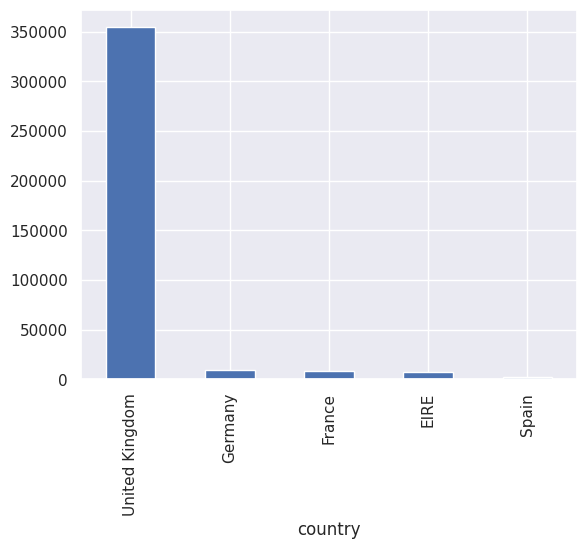

In [ ]:
# 주문량이 가장 많은 상위 5개 국가를 bar plot으로 나타내기

oln1.country.value_counts().head(5).plot.bar()

In [ ]:
#가장 많은 돈을 쓴 고객과 가장 적게 쓴 고객은 ?
# 고객 id에 대해 사용금액(spent)컬럼을 더해서 집계하기

res1 = oln1[['customerid','spent']].groupby(['customerid']).sum()
res1.sort_values('spent', ascending=False)

res1 = res1[(res1['spent'] > 0)] # 구매고객이 0이상인 고객만 산출하기

print('고객번호 {} 이 가장 소비를 많이 했다. {:.2f}'.format(int(res1['spent'].argmax()),res1['spent'].max()))
print('고객번호 {} 이 가장 소비를 적게 했다. {:.2f}'.format(int(res1['spent'].argmin()),res1['spent'].min()))

고객번호 1689 이 가장 소비를 많이 했다. 280206.02
고객번호 3217 이 가장 소비를 적게 했다. 3.75


<Axes: ylabel='unitprice'>

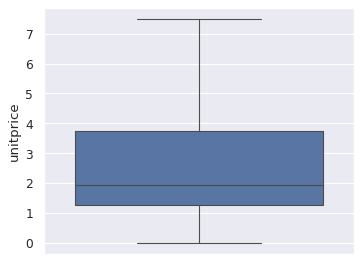

In [ ]:
#상품 금액대의 분포를 box plot을 그려보자

f, ax = plt.subplots(1,1, figsize=(5,4), dpi = 80)

#box plot
#최댓값, 최솟값, 중앙값을 사용하여 자료의 측정값들이 어떤 모양으로 분포 되어있는지 등을 쉽게 알수 있다.

sns.boxplot(oln1['unitprice'], showfliers=False, ax=ax)

# 대체로 2 파운드 근처에서 상품 가격대가 형성되어 있다.

In [ ]:
# 주문량이 많은 상품 금액대 파악
chk1 = oln1[oln1['unitprice'] <=7].shape[0] / oln1['unitprice'].shape[0] * 100
print("8파운드 이하 상품 주문이 {:.2f}% 를 차지합니다.".format(chk1))

8파운드 이하 상품 주문이 91.05% 를 차지합니다.


In [ ]:
# 주문량이 상품 금액대 확인
chk2 = np.sum(oln1[oln1['unitprice']<=8].spent) / np.sum(oln1.spent) * 100
print("수익의 {:.2f}% 는 8파운드 이하의 상품에서 발생한다.".format(chk2))

수익의 88.09% 는 8파운드 이하의 상품에서 발생한다.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

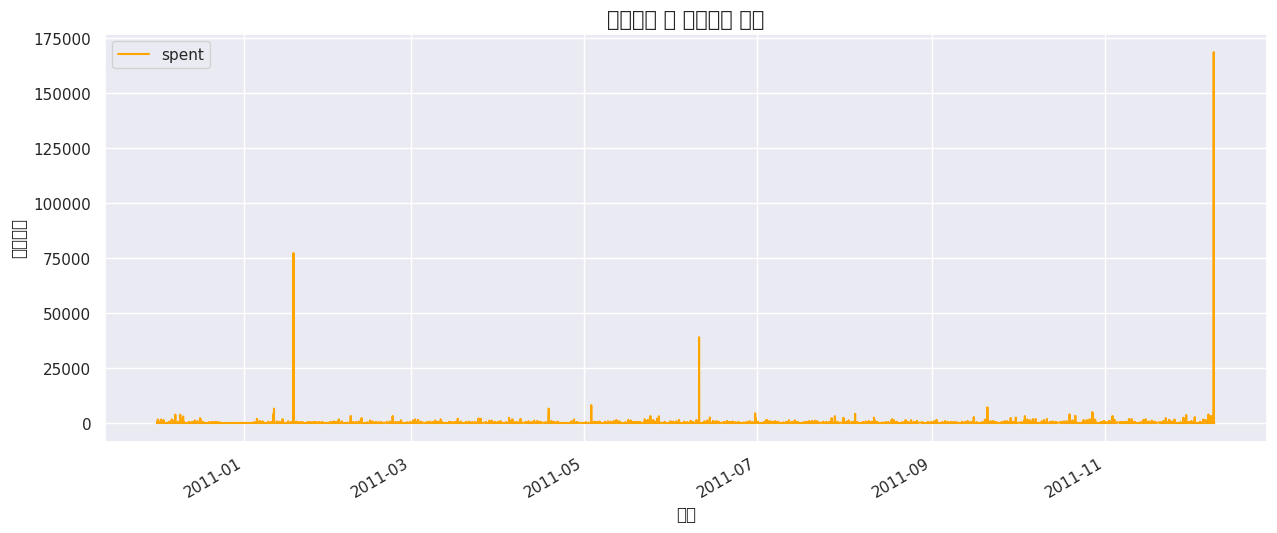

In [ ]:
# 주문 날짜에 따른 판매금액(spent) 를 나타내자
oln1.plot(x = 'invoicedate', y = 'spent', color='orange', figsize=(15,6))

plt.title('주문날짜 별 판매금액 추이', fontsize = 15)
plt.xlabel('날짜')
plt.ylabel('판매금액')

plt.show()

# 실제 판매자라면 ? 판매 금액이 높은 날 어떤일이 있었는지 등을 분석할수 있어야한다.

## 4.3 요일별 / 시간별 주문량

In [ ]:
# 주문번호가 중복되므로 (하나의 주문번호당 상품 여러개) 요일별 주문번호 하나만 남기기
res2 = oln1.drop_duplicates(['invoiceno'], keep='first')
res2

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011,12,9,4,12
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011,12,9,4,12
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011,12,9,4,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011,12,9,4,12


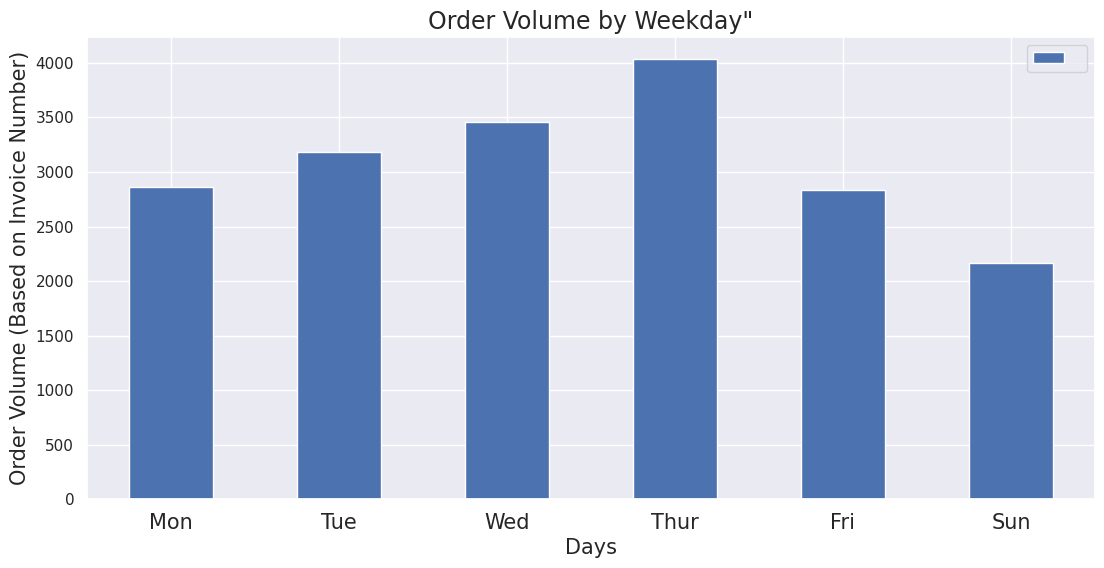

In [ ]:
# 요일별 주문량 확인하기 (주문번호 기준)
g1= res2[['weekday', 'invoiceno']].groupby('weekday').count().plot(kind='bar', figsize = (13,6))

g1.set_xlabel('Days', fontsize = 15)
g1.set_ylabel('Order Volume (Based on Invoice Number)', fontsize = 15)
g1.set_title('Order Volume by Weekday"', fontsize = 17)
g1.set_xticklabels(('Mon', 'Tue', 'Wed','Thur','Fri','Sun'), rotation = 'horizontal', fontsize=15)
g1.legend(' ') # legend가 없어도 되는 그래프에서는 삭제해줘도 무방
plt.show()

In [ ]:
# 시간대별 주문 번호 수 count하기
res3 = res2[['hour','invoiceno']].groupby('hour').count()
res3

,invoiceno
hour,
6,1
7,29
8,555
9,1394
10,2226
11,2277
12,3129
13,2637
14,2275


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

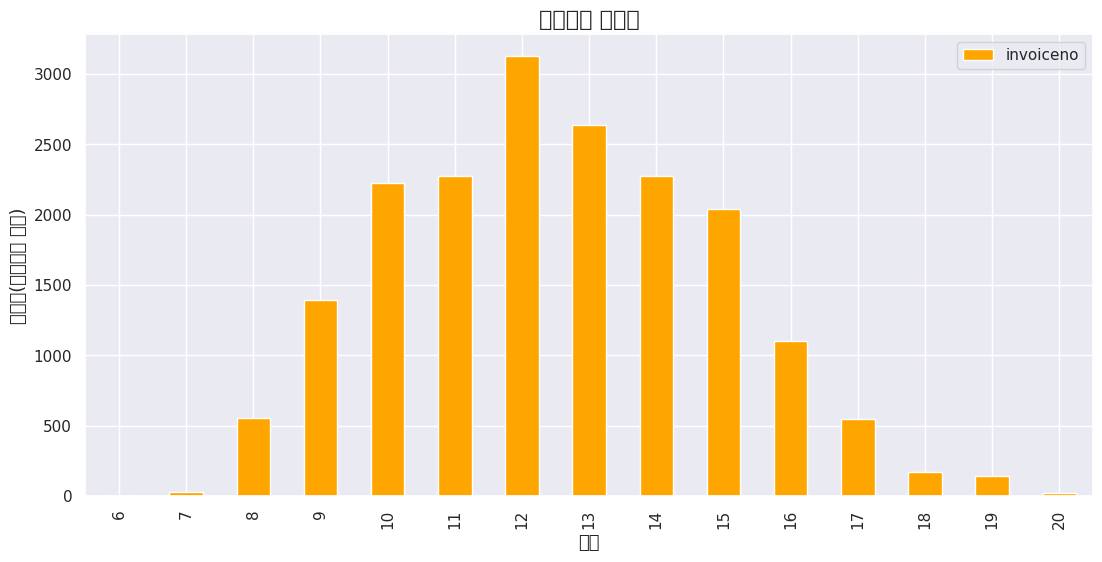

In [ ]:
#시간 대별 주문량 확인하기
g2 = res3.plot(kind='bar', color ='orange', figsize=(13, 6))

g2.set_xlabel('시간', fontsize=13)
g2.set_ylabel('주문량(주분번호 기준)', fontsize =13)
g2.set_title('시간대별 주문량', fontsize= 16)
plt.show()

## 4.4 국가별 1회 주문의 평균 구매금액

In [ ]:
# 국가 별 주문 당 평균 구매 금액
# 국가별 주문 건수를 센다음, (전체쓴돈 / 주문건수) 구하자
# 필요한 컬러만 가저오기

res4 = oln1[['quantity','spent','country','invoiceno']] #필요한 컬럼만 우선 으로 변수 저장
res4


,quantity,spent,country,invoiceno
0,6,15.30,United Kingdom,536365
1,6,20.34,United Kingdom,536365
2,8,22.00,United Kingdom,536365
3,6,20.34,United Kingdom,536365
4,6,20.34,United Kingdom,536365
...,...,...,...,...
541904,12,10.20,France,581587
541905,6,12.60,France,581587
541906,4,16.60,France,581587
541907,4,16.60,France,581587


In [ ]:
#국가별 주문번호를 집계하고 count =1 를 컬럼을 단다.

aa = res4.groupby(['country','invoiceno']).sum()
aa['count'] = 1
aa

quantity    spent  count
country     invoiceno                          
Australia   536389          107   358.25      1
            537676          214   258.90      1
            539419          146   415.70      1
            540267         4662  7011.38      1
            540280          140   143.00      1
...                         ...      ...    ...
Unspecified 559929          271   252.05      1
            561658          205   347.35      1
            561661          114   199.08      1
            563947          126   252.90      1
            564051           59   278.13      1

[18536 rows x 3 columns]

In [ ]:
#aa를 국가별로 sum을 하면 count.sum() = 국가별 주문건수
bb = aa.groupby('country').sum() # 주문번호가 몇개 인지 sum한거임. 그래서 앞에서 aa 작업할때 count = 1로 해두고 거기에 주문번호가 sum이됨.
bb

,quantity,spent,count
country,,,
Australia,84209,138521.310,57
Austria,4881,10198.680,17
Bahrain,260,548.400,2
Belgium,23237,41196.340,98
Brazil,356,1143.600,1
Canada,2763,3666.380,6
Channel Islands,9491,20450.440,26
Cyprus,6361,13590.380,16
Czech Republic,671,826.740,2


In [ ]:
## bb의 spent / count하면 하면 해당 국가별 주문 건당 평균 매출액을 집계할 수 있다.
bb['avg_spent'] = bb['spent'] / bb['count']
bb.sort_values(['count','avg_spent'], ascending=False, inplace=True)
bb.head()

,quantity,spent,count,avg_spent
country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816


Text(0.5, 0, '금액')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*a

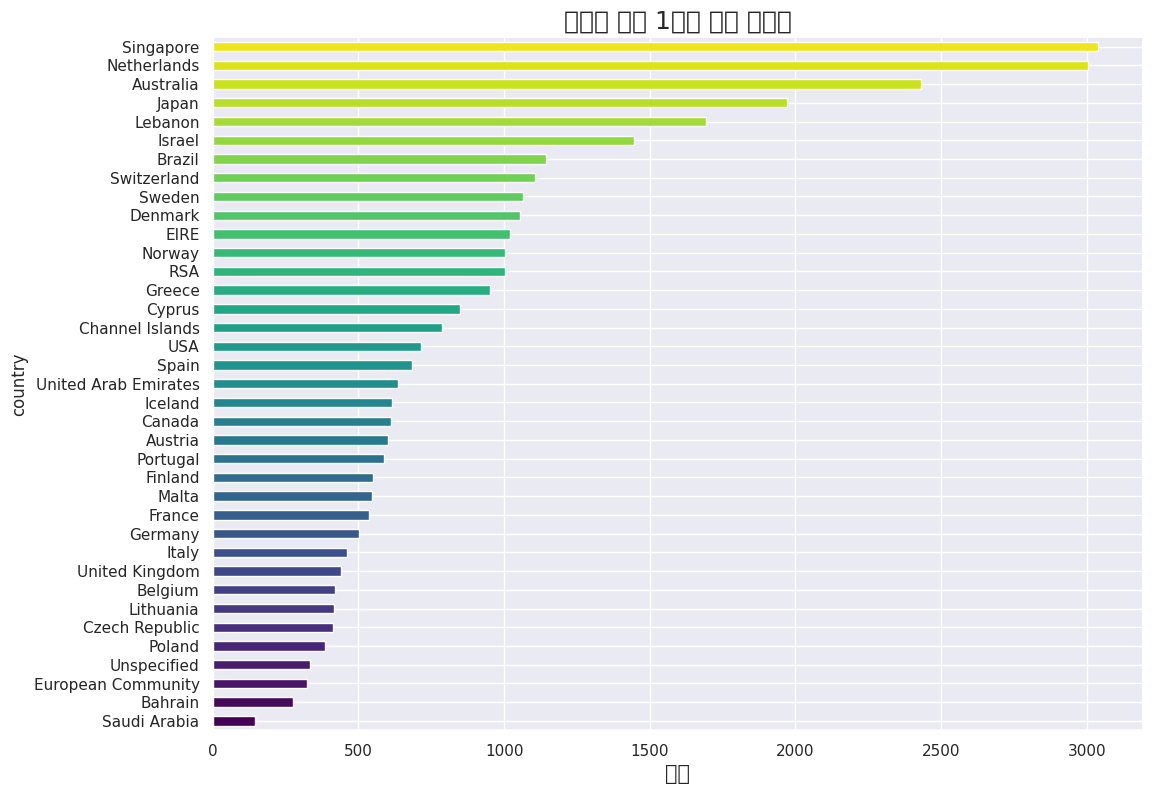

In [ ]:
# 국가별 평균 구매 금액 그래프 그리기
color=plt.cm.viridis(np.linspace(0,1,38))

# 가로로 그릴 때는 barh 옵션 사용

bb['avg_spent'].sort_values().plot(kind='barh', figsize=(12,9), color = color)
plt.title("국가별 주문 1건당 편균 매출액", size =18)
plt.xlabel('금액', size =15)

위의 차트의 결과는 영국이 구매 건수에 대한 양은 많지만 실제 주문한번에 가장 많은 금액의 평균은 '싱가포르가' 크다는 점을 알수 있다.

4.5 상품명에서 가장 빈번하게 등장하는 단어

In [ ]:
#word cloud 패키지 import
from wordcloud import WordCloud
from wordcloud import STOPWORDS


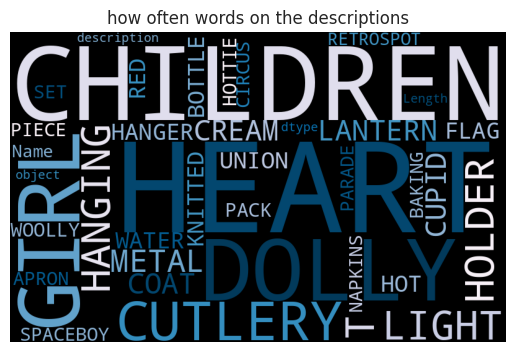

In [ ]:
# word cloud를 손쉽게 그릴 수 있따.
stopwords = set(STOPWORDS)
stopwords.add('white') # 많이 나오는 단어 없앨수 잇음.
# 영어 문장 분석하다보면 관사와같은 분석에 슬데 없는 단어가 상위로 올라 올때 유용.

wordcloud = WordCloud(stopwords=stopwords , background_color='black', width=800, height=500, colormap = 'PuBu').generate(str(oln1['description']))

plt.axis('off')
plt.title('how often words on the descriptions')
plt.imshow(wordcloud)


online retail 데이터는 :
총 데이터 수  :  4335272
총 결측치수 : 136534
전체 국가수 : 38
전체 판매 물건수 : 4223

### - 어떤 고객이 가장 많이 지출 했을까 ?
##### 고객번호 1689가 가장 소비를 많이 했다.
##### 고객 번호 3217이 가장 소비를 적게 했다.
### - 상품 금액의 분포는 ?
##### 대체로 2파운드 근처에서 상품 가격대가 형성되어 있다.
##### 8파운드 이하 상품 주문이 93.28 % 차지한다.
##### 수익의 88.09%는 8파운드 이하의 상품에서 발생한다.
### - 어떤 물건의 주무량이 높을까 ?
##### WHITE HANGING HEART T-LIGHT HOLDER
### - 주문 날짜별 판매량 ?
##### - 요일/ 시간에 따라서 주문량이 다를까 ?
##### 목요일 주문이 가장 많고 일요일 주문이 가장적다
##### 낮 12시에 주문이 가장 많았다.
### - 국가별 고객 1인당 평균 구매 금액은?
##### 영국의 매출액이 가장 높지만, 1인당 구매금액은 싱가포르가 가장 높다.
### - 이 쇼핑몰 판매 물품의 주요 키워드는 ?
##### White, Heart, Childres
